In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline
df=pd.read_csv("pokemon.csv")
#pd.options.display.max_rows = None ## this command is too see all dataset
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [11]:
df_hp=df.groupby(['Type 1','Type 2','Attack','Defense'])[['HP']].max()
df_hp2=df.groupby(['Type 1','Type 2'])[['HP']].max()
df_hp.head(10)

HP
Type 1 Type 2   Attack Defense    
Bug    Electric 47     50       50
                77     60       70
       Fighting 125    75       80
                185    115      80
       Fire     60     65       85
                85     55       55
       Flying   20     30       40
                30     42       30
                35     50       55
                45     50       60

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0.0,0.0,0.0,55.0,0.0,95.0,60.000000,61.571429,45.0,76.666667,97.5,0.000000,0.0,58.083333,0.0,146.666667,112.428571,32.0
Dark,0.0,0.0,70.0,0.0,0.0,92.5,56.666667,73.800000,100.0,0.000000,0.0,60.000000,0.0,0.000000,70.5,0.000000,85.000000,0.0
Dragon,0.0,0.0,0.0,120.0,110.0,0.0,100.000000,97.500000,0.0,0.000000,88.2,93.333333,0.0,0.000000,97.5,0.000000,0.000000,0.0
Electric,0.0,0.0,105.0,0.0,57.0,0.0,107.000000,78.400000,77.0,107.000000,0.0,107.000000,42.5,0.000000,0.0,0.000000,93.333333,107.0
Fairy,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,90.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


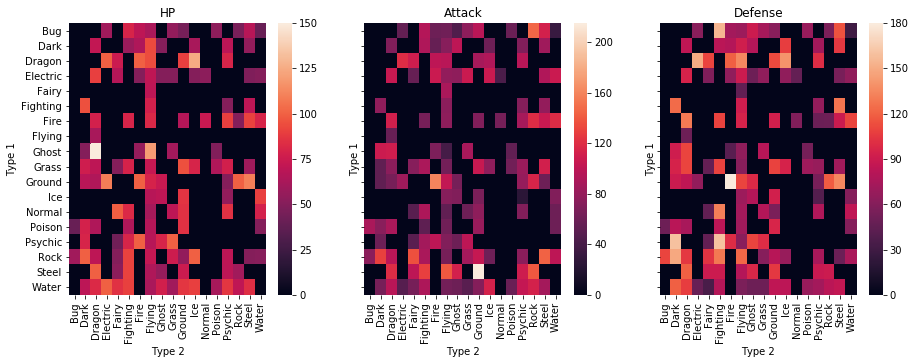

In [12]:
import matplotlib.pyplot as plt
df_hpmean=df.groupby(['Type 1','Type 2'])[['HP']].mean()
df_attmean=df.groupby(['Type 1','Type 2'])[['Attack']].mean()
df_defmean=df.groupby(['Type 1','Type 2'])[['Defense']].mean()
df_hpmean_unstacked=df_hpmean.unstack().fillna(0.0)['HP']
df_attmean_unstacked=df_attmean.unstack().fillna(0.0)['Attack']
df_defmean_unstacked=df_defmean.unstack().fillna(0.0)['Defense']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
sns.heatmap(df_hpmean_unstacked, ax=ax1)
ax1.set_title('HP')
ax2.set_title('Attack')
ax3.set_title('Defense')
sns.heatmap(df_defmean_unstacked, ax=ax2)
sns.heatmap(df_attmean_unstacked, ax=ax3)
df_defmean_unstacked.head()


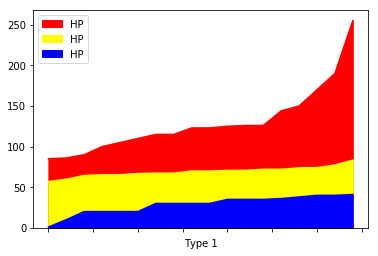

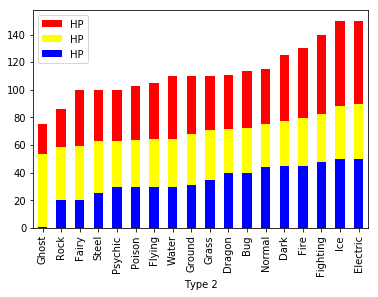

In [13]:
df4=df.groupby(['Type 1'])[['HP']].max().sort_values(by=['HP'])
df5=df.groupby(['Type 1'])[['HP']].mean().sort_values(by=['HP'])
df6=df.groupby(['Type 1'])[['HP']].min().sort_values(by=['HP'])
ax1 = df4.plot(kind='area', color='Red')
df5.plot(kind='area',ax=ax1, color='Yellow')
df6.plot(kind='area',ax=ax1, color='Blue')
df7=df.groupby(['Type 2'])[['HP']].max().sort_values(by=['HP'])
df8=df.groupby(['Type 2'])[['HP']].mean().sort_values(by=['HP'])
df9=df.groupby(['Type 2'])[['HP']].min().sort_values(by=['HP'])
ax2 = df7.plot.bar(color='Red')
df8.plot.bar(ax=ax2, color='Yellow')
df9.plot.bar(ax=ax2, color='Blue')

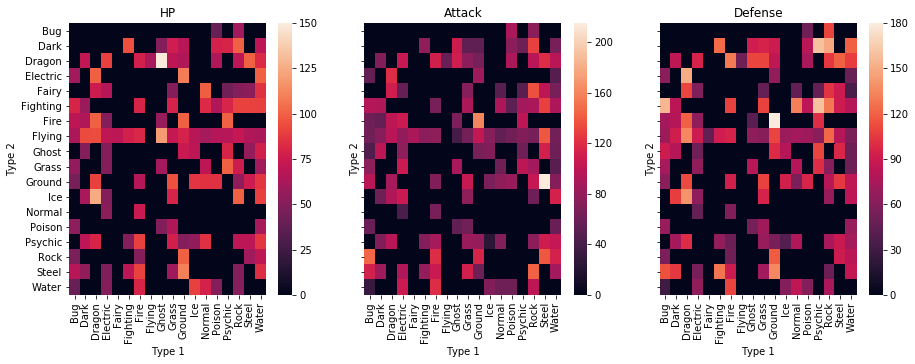

In [14]:
df_hpmean=df.groupby(['Type 1','Type 2'])[['HP']].mean().sort_values(by='HP')
df_hpmean_unstacked=df_hpmean.unstack().fillna(0.0)['HP']
df_hpmean_unstacked['avghp']=df_hpmean_unstacked.sum(axis=1).sort_values(axis=0, inplace=True)
df_hpmean_unstacked=df_hpmean_unstacked.drop(['avghp'], axis=1)
df_hpmean_unstacked=df_hpmean_unstacked.transpose()
df_hpmean_unstacked['avghp']=df_hpmean_unstacked.sum(axis=1).sort_values(axis=0, inplace=True)
df_hpmean_unstacked=df_hpmean_unstacked.drop(['avghp'], axis=1)

df_attmean=df.groupby(['Type 1','Type 2'])[['Attack']].mean().sort_values(by='Attack')
df_attmean_unstacked=df_attmean.unstack().fillna(0.0)['Attack']
df_attmean_unstacked['avghp']=df_attmean_unstacked.sum(axis=1).sort_values(axis=0, inplace=True)
df_attmean_unstacked=df_attmean_unstacked.drop(['avghp'], axis=1)
df_attmean_unstacked=df_attmean_unstacked.transpose()
df_attmean_unstacked['avghp']=df_attmean_unstacked.sum(axis=1).sort_values(axis=0, inplace=True)
df_attmean_unstacked=df_attmean_unstacked.drop(['avghp'], axis=1)

df_defmean=df.groupby(['Type 1','Type 2'])[['Defense']].mean().sort_values(by='Defense')
df_defmean_unstacked=df_defmean.unstack().fillna(0.0)['Defense']
df_defmean_unstacked['avghp']=df_defmean_unstacked.sum(axis=1).sort_values(axis=0, inplace=True)
df_defmean_unstacked=df_defmean_unstacked.drop(['avghp'], axis=1)
df_defmean_unstacked=df_defmean_unstacked.transpose()
df_defmean_unstacked['avghp']=df_defmean_unstacked.sum(axis=1).sort_values(axis=0, inplace=True)
df_defmean_unstacked=df_defmean_unstacked.drop(['avghp'], axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
sns.heatmap(df_hpmean_unstacked, ax=ax1)
ax1.set_title('HP')
ax2.set_title('Attack')
ax3.set_title('Defense')
sns.heatmap(df_defmean_unstacked, ax=ax2)
sns.heatmap(df_attmean_unstacked, ax=ax3)
